#  Docs reference website for time series
# https://strftime.org/
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

# Visulize the Time Series data.
# Make the time series data Stationary.
# Plot the correlation and AutoCorrelation Charts.
# Consturct the ARIMA Model or Seasonal ARIMA based on the data. (Auto regressive Integrated Moving Averages.
# Use the model to make predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset\\sales-cars.csv')
data

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180
5,2016-06,169
6,2016-07,232
7,2016-08,225
8,2016-09,193
9,2016-10,123


In [3]:
data.info()  # Ideally we didn't get any blank data in Time series dataset but if you have any please delete it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null object
Sales    36 non-null int64
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
data.describe()

,Sales
count,36.00000
mean,295.75000
std,117.81908
min,119.00000
25%,192.50000
50%,280.00000
75%,402.75000
max,520.00000


In [5]:
from pandas import datetime
def dateParser(x):
    return datetime.strptime(x, '%Y-%m')  #%d-%m-%y - if its looks like having date column

In [6]:
# Example

timeData = '2019-01'
print(type(timeData))

<class 'str'>


In [7]:
finalDateTime = dateParser(timeData)
print(type(finalDateTime))
print(finalDateTime)

<class 'datetime.datetime'>
2019-01-01 00:00:00


In [8]:
# So in below index_col=0 whatever is 0th column will be consider as 0. WHatever passing in 0th colmun it should be in datatime & parsing the date we hve function as dateParser 
 
data = pd.read_csv('dataset\\sales-cars.csv', 
                   index_col=0, 
                   parse_dates=[0], date_parser=dateParser)

In [9]:
data

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
Sales    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


C:\Users\KiranThakur\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


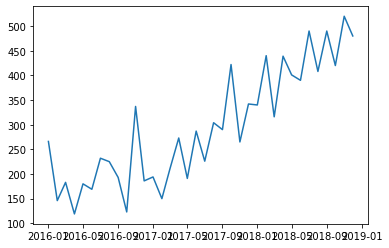

In [11]:
# Checking of Statinary Dataset or not
plt.plot(data)

In [12]:
# Since above data is Trend data so we can perforn integral with 1 step to convert the same into
# Stationary data which will be an input for model
# Below diff function only applicable when you have date-time index so that means you need to convet your dataset like above steps 10,11

modifiedData = data.diff(periods=1)
modifiedData.dropna(inplace=True)
modifiedData

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0
2016-10-01,-70.0


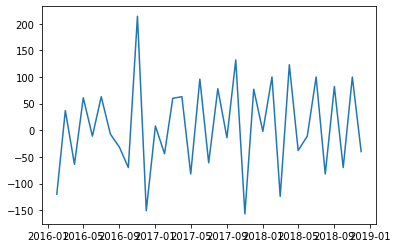

In [13]:
plt.plot(modifiedData)

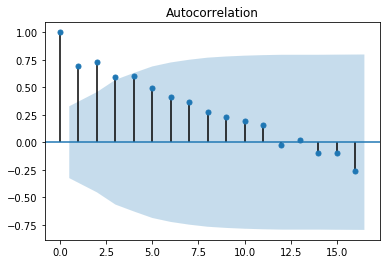

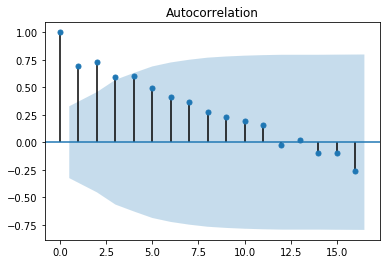

In [14]:
# Technique no 2 - to find data is Stionary data or not
# Check Autocorrelation

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

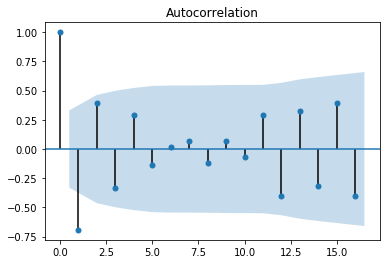

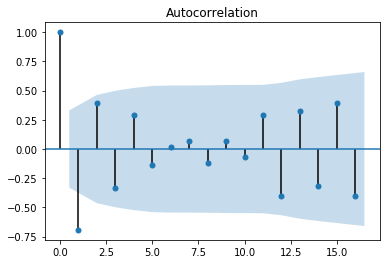

In [15]:
plot_acf(modifiedData) # So in below 1st data point +,2nd downtowrds -, 3rd + like that if we get correlation then that dataset is good for ARIMA or AR model

In [16]:
#Create train test split as 80% and 20% split
#Your data must be in numpy array

features = modifiedData.values
train = features[0:27]
test = features[27:]

In [17]:
train

array([[-120.],
       [  37.],
       [ -64.],
       [  61.],
       [ -11.],
       [  63.],
       [  -7.],
       [ -32.],
       [ -70.],
       [ 214.],
       [-151.],
       [   8.],
       [ -44.],
       [  60.],
       [  63.],
       [ -82.],
       [  96.],
       [ -61.],
       [  78.],
       [ -14.],
       [ 132.],
       [-157.],
       [  77.],
       [  -2.],
       [ 100.],
       [-124.],
       [ 123.]])

In [18]:
test

array([[-38.],
       [-11.],
       [100.],
       [-82.],
       [ 82.],
       [-70.],
       [100.],
       [-40.]])

In [19]:
modifiedData.count()

Sales    35
dtype: int64

In [20]:
#AR model demo -

from statsmodels.tsa.ar_model import AR
model1 = AR(train)
finalARmodel = model1.fit()

In [21]:
predict = finalARmodel.predict(start = 27, end = 34)
predict             # this will give 1D array

array([ -89.40066008,   92.93492421,  -48.69345073,   90.19600547,
       -103.28657331,   80.97211576,  -11.82208773,   52.14624024])

In [22]:
test          # this will give 2D array

array([[-38.],
       [-11.],
       [100.],
       [-82.],
       [ 82.],
       [-70.],
       [100.],
       [-40.]])

In [23]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test,predict.reshape(-1,1))

17915.563224690224

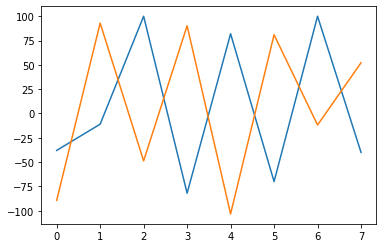

In [24]:
plt.plot(test)
plt.plot(predict)   # its not a good trend because test showing uptrend whereas it shows downtrend for predict due to above errors

In [25]:
# ARIMA implementation

from statsmodels.tsa.arima_model import ARIMA
p=1
d=1
q=1

model2 = ARIMA(train, order =(p,d,q))
finalARIMAmodel = model2.fit()

In [26]:
finalARIMAmodel.aic # another mesure like meansquareError. This air = Akaike information crierion. Here try to get minimum aic which denos better will be your accuracy

304.361056332427

In [27]:
# can write for loop to get best aic value

In [28]:
predictARIMA = finalARIMAmodel.forecast(steps = 9)  # steps 9 means want prediction for next 9 months

In [29]:
predictARIMA

(array([-52.72048797,  72.33079182, -13.81133702,  48.34055847,
          6.36459413,  37.504261  ,  17.30420442,  33.15344619,
         23.68989264]),
 array([65.62823057, 80.19127591, 86.47346336, 89.40854034, 90.82076085,
        91.50902676, 91.84647517, 92.01239645, 92.09409342]),
 array([[-181.34945626,   75.90848032],
        [ -84.84122083,  229.50280446],
        [-183.29621082,  155.67353679],
        [-126.89696051,  223.57807746],
        [-171.64082618,  184.37001444],
        [-141.8501357 ,  216.85865771],
        [-162.71157902,  197.31998785],
        [-147.18753698,  213.49442937],
        [-156.81121364,  204.19099892]]))

In [30]:
predictARIMA[0]

array([-52.72048797,  72.33079182, -13.81133702,  48.34055847,
         6.36459413,  37.504261  ,  17.30420442,  33.15344619,
        23.68989264])

# Champagne_timeseries

In [31]:
df = pd.read_csv('dataset\\champagne_timeseries.csv')
df

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null object
Sales    105 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [33]:
#Convert month into datetime

df['Month'] = pd.to_datetime(df['Month'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null datetime64[ns]
Sales    105 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [35]:
df.set_index('Month', inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
Sales    105 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


In [37]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


# Step 2 - Visualize the data

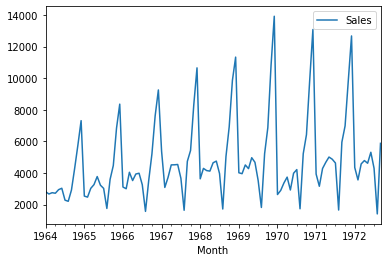

In [38]:
df.plot()

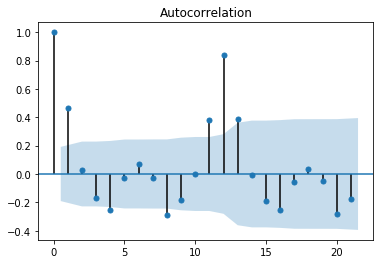

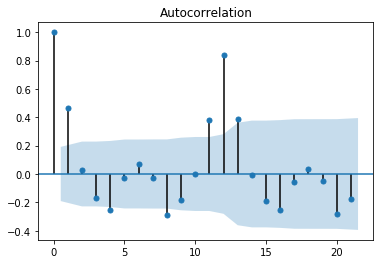

In [39]:
# Step 2 from above found that data is not Stationary

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [40]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [41]:
test_result=adfuller(df['Sales'])

In [42]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [43]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [44]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [45]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [46]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [47]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [48]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


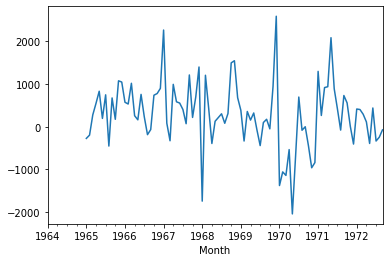

In [49]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

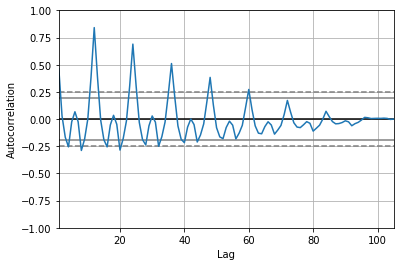

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

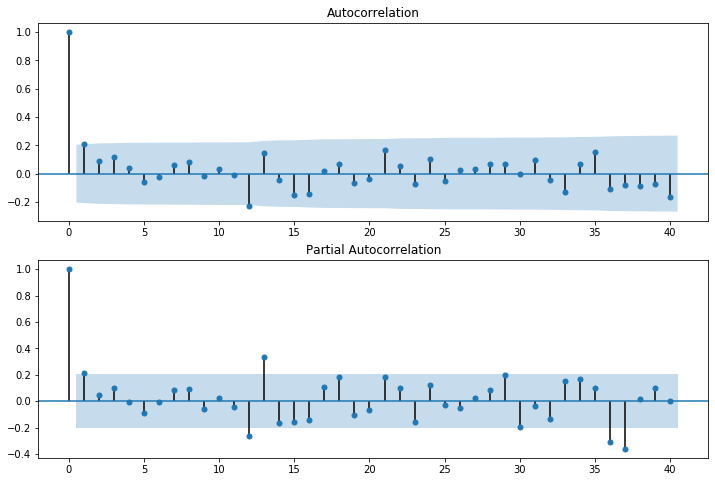

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [53]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [54]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\KiranThakur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\KiranThakur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 18 May 2020   AIC                           1910.251
Time:                        09:53:38   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.069      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

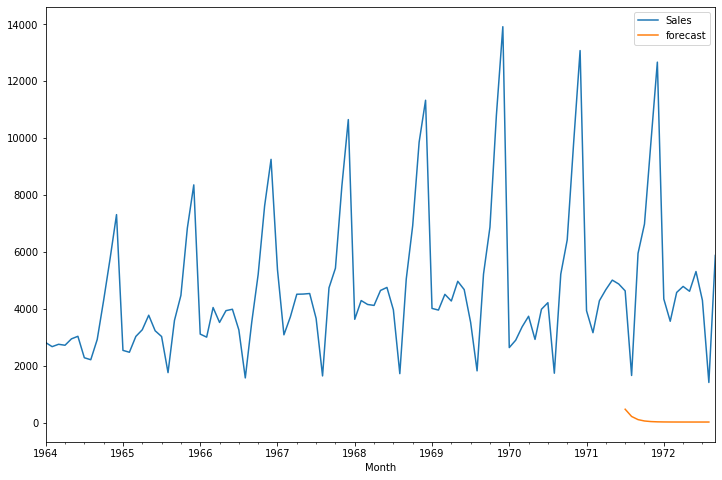

In [56]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [57]:
import statsmodels.api as sm

In [58]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\KiranThakur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


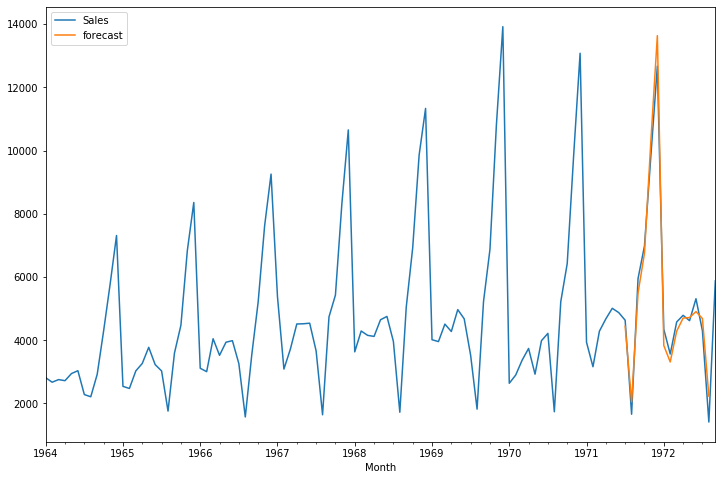

In [59]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [60]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [61]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [62]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [63]:
future_df=pd.concat([df,future_datest_df])

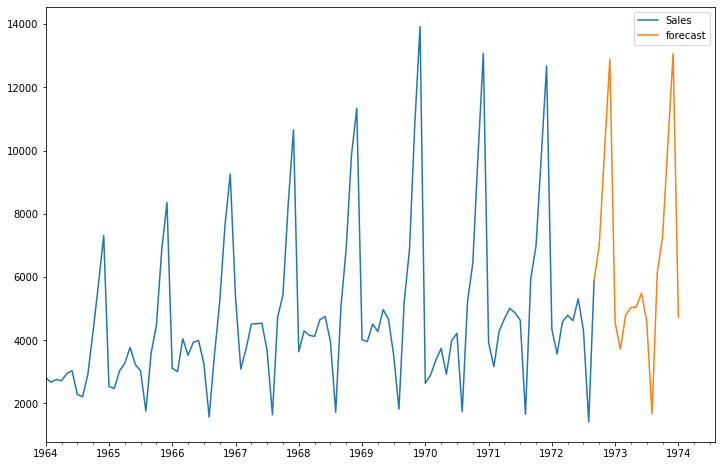

In [64]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

## Check another example of Timeseries - California Female Births

In [65]:
datacal = pd.read_csv('dataset\\daily-total-female-births-CA_timeseries.csv')
datacal

,date,births
0,1/1/1959,35
1,1/2/1959,32
2,1/3/1959,30
3,1/4/1959,31
4,1/5/1959,44
...,...,...
360,12/27/1959,37
361,12/28/1959,52
362,12/29/1959,48
363,12/30/1959,55


In [66]:
datacal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
date      365 non-null object
births    365 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [67]:
#Convert data into datetime

datacal['date'] = pd.to_datetime(datacal['date'])

In [68]:
datacal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
date      365 non-null datetime64[ns]
births    365 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [69]:
datacal.set_index('date', inplace=True)

In [70]:
datacal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
births    365 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


In [71]:
datacal

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


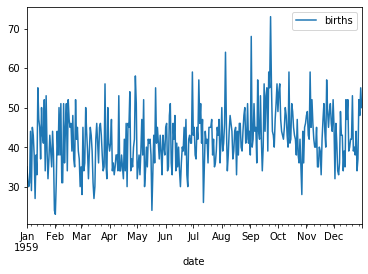

In [72]:
datacal.plot()

In [73]:
datacal_mean = datacal.rolling(window=20).mean()

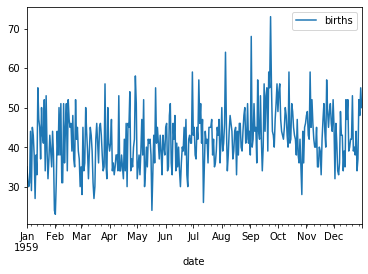

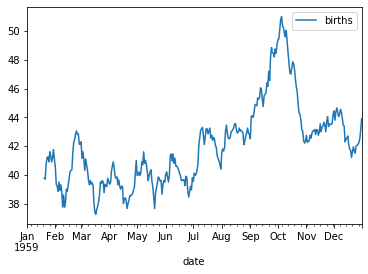

In [74]:
datacal.plot()
datacal_mean.plot()

In [75]:
type(datacal)

pandas.core.frame.DataFrame

In [76]:
series_value = datacal.values

In [77]:
type(series_value)

numpy.ndarray

In [78]:
datacal.size

365

In [79]:
value = pd.DataFrame(series_value)

In [80]:
birth_df = pd.concat([value, value.shift(1)], axis =1)

In [81]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [82]:
birth_df.columns = ['Actual_birth', 'Forcast_birth']
birth_df

,Actual_birth,Forcast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [83]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [84]:
birth_test = birth_df[1:]
birth_test

,Actual_birth,Forcast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [85]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forcast_birth)
birth_error

84.22252747252747

In [86]:
np.sqrt(birth_error)

9.177283229394606

## ARIMA - Autoregressive (p) Integrated (d=1 means current value - previous value & d=2 means current value - previous 2 previous value ) Moving Average (q)

In [87]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

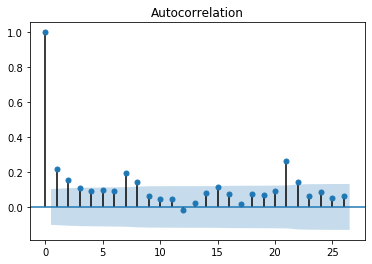

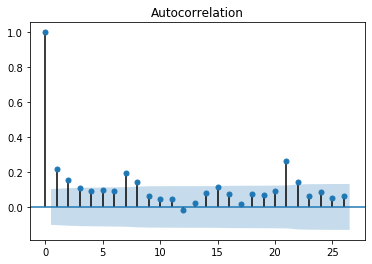

In [88]:
# plot_acf is to identify parameter q
# ARIMA (p,d,q)

plot_acf(datacal)

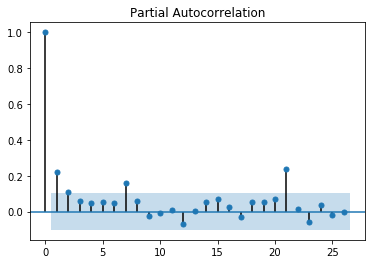

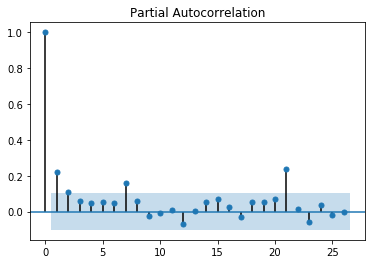

In [89]:
plot_pacf(datacal) # plot_acf is to identify parameter p

In [90]:
# p = 2,3 or d = 0 and q = 3,4

datacal.size

365

In [91]:
birth_train = datacal[0:330]
birth_test = datacal[330:365]

In [92]:
birth_train.size

330

In [93]:
birth_test.size

35

In [94]:
from statsmodels.tsa.arima_model import ARIMA

birth_model = ARIMA(birth_train, order=(3,1,4))

C:\Users\KiranThakur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\KiranThakur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [95]:
birth_model_fit = birth_model.fit()

C:\Users\KiranThakur\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [96]:
birth_model_fit.aic

2225.0228985618755

In [97]:
birth_forcast = birth_model_fit.forecast(steps =35)[0]
birth_forcast

array([43.90001743, 44.06473007, 44.3950663 , 45.37838215, 45.58484465,
       45.55251713, 44.66894564, 44.2500377 , 44.01430046, 44.7414403 ,
       45.32313985, 45.88530438, 45.48722214, 44.96191571, 44.22476163,
       44.32636393, 44.73674959, 45.60627925, 45.85854157, 45.73863851,
       44.949758  , 44.49491989, 44.35280019, 45.00726497, 45.62267245,
       46.08929355, 45.74175036, 45.17841602, 44.53295975, 44.60335982,
       45.06043657, 45.84827883, 46.11767025, 45.94093801, 45.21847984])

In [98]:
birth_test  # So here you can comare earch and every value from below table to above birth_forcast here 51~45, 46~46.31, 44~43.64

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [99]:
np.sqrt(mean_squared_error(birth_test, birth_forcast))

6.615528907561189

In [100]:
#AR model demo -

from statsmodels.tsa.ar_model import AR
ARmodel = AR(birth_train)
finalARmodel = ARmodel.fit()

C:\Users\KiranThakur\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [101]:
predict = finalARmodel.predict(start = 330, end = 365)
predict             # this will give 1D array

1959-11-27    45.631587
1959-11-28    44.624383
1959-11-29    43.254413
1959-11-30    44.695221
1959-12-01    44.531643
1959-12-02    42.558466
1959-12-03    43.422750
1959-12-04    44.549105
1959-12-05    43.203212
1959-12-06    42.688322
1959-12-07    43.334251
1959-12-08    43.601238
1959-12-09    43.431610
1959-12-10    43.190674
1959-12-11    43.483174
1959-12-12    43.255059
1959-12-13    42.810737
1959-12-14    42.906390
1959-12-15    42.975782
1959-12-16    42.808328
1959-12-17    42.715330
1959-12-18    42.794179
1959-12-19    42.786507
1959-12-20    42.621999
1959-12-21    42.543287
1959-12-22    42.589396
1959-12-23    42.567760
1959-12-24    42.523319
1959-12-25    42.542356
1959-12-26    42.544301
1959-12-27    42.492336
1959-12-28    42.445390
1959-12-29    42.440785
1959-12-30    42.431205
1959-12-31    42.403135
1960-01-01    42.396701
Freq: D, dtype: float64

In [102]:
from sklearn.metrics import mean_squared_error

birth_error = mean_squared_error(birth_test, predict)
birth_error

ValueError: Found input variables with inconsistent numbers of samples: [35, 36]

In [ ]:
?mean_squared_error